<a href="https://colab.research.google.com/github/Sh2680/MML-/blob/main/UGMR_2023_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

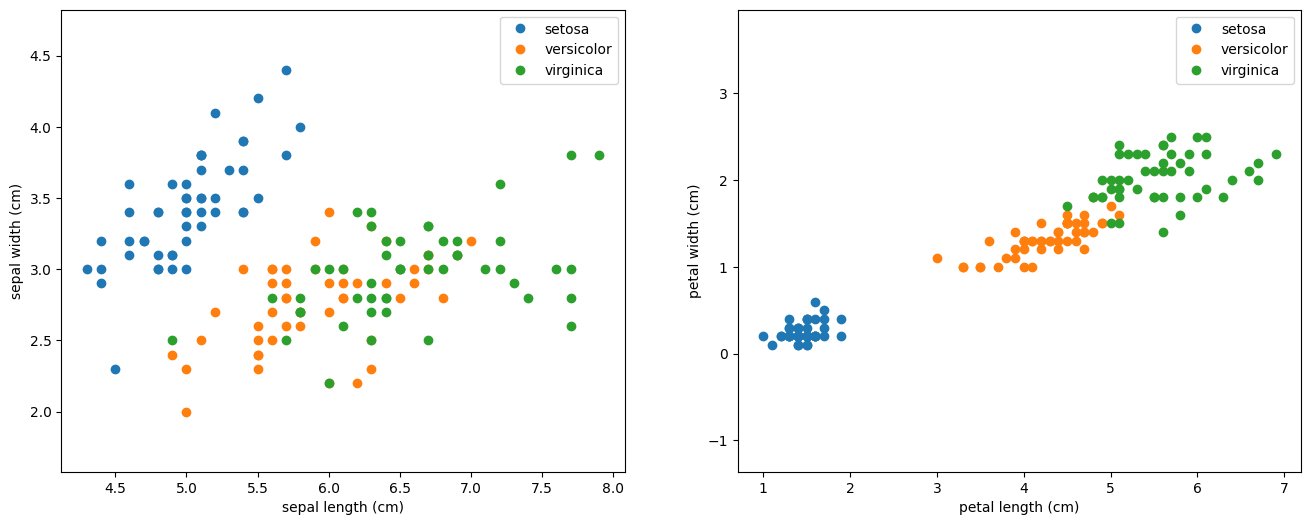

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 284.97it/s]


# Plot training progress

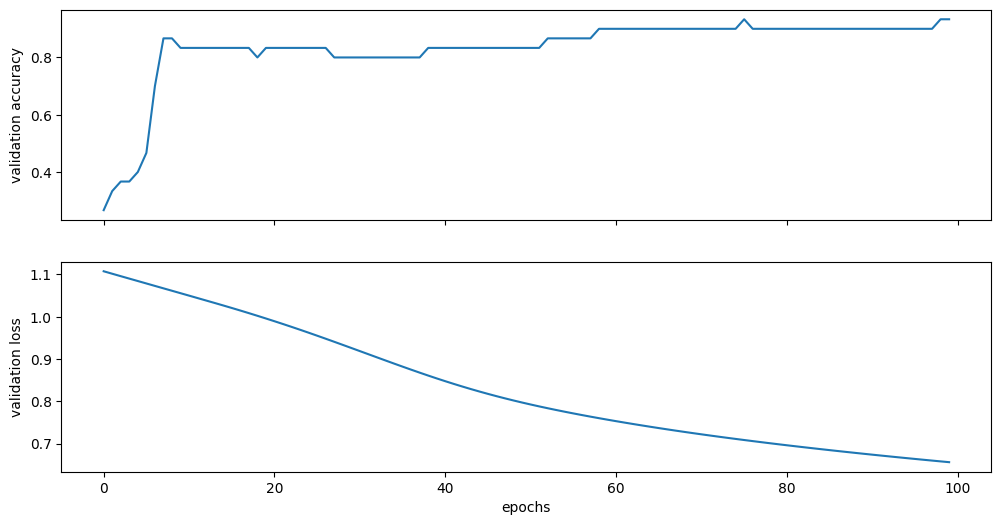

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

Answers

In [9]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm
import numpy as np

# Defining the original model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [10]:
#answer 1
class ModelWithExtraLayer(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithExtraLayer, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x


In [11]:
#answer 2
class ModelWithMoreNeurons(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithMoreNeurons, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [12]:
#answer 3
class ModelWithTanhActivation(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithTanhActivation, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [13]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=100):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    loss_list = np.zeros((epochs,))
    accuracy_list = np.zeros((epochs,))

    for epoch in tqdm.trange(epochs):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    return loss_list, accuracy_list

# Training and evaluating original model
model = Model(X_train.shape[1])
loss_list, accuracy_list = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)


100%|██████████| 100/100 [00:00<00:00, 577.79it/s]


In [14]:
# Training and evaluating model with extra hidden layer
model_with_extra_layer = ModelWithExtraLayer(X_train.shape[1])
loss_list_extra_layer, accuracy_list_extra_layer = train_and_evaluate_model(model_with_extra_layer, X_train, y_train, X_test, y_test)

# Training and evaluating model with more neurons
model_with_more_neurons = ModelWithMoreNeurons(X_train.shape[1])
loss_list_more_neurons, accuracy_list_more_neurons = train_and_evaluate_model(model_with_more_neurons, X_train, y_train, X_test, y_test)

# Training and evaluating model with Tanh activation
model_with_tanh_activation = ModelWithTanhActivation(X_train.shape[1])
loss_list_tanh, accuracy_list_tanh = train_and_evaluate_model(model_with_tanh_activation, X_train, y_train, X_test, y_test)


100%|██████████| 100/100 [00:00<00:00, 394.77it/s]


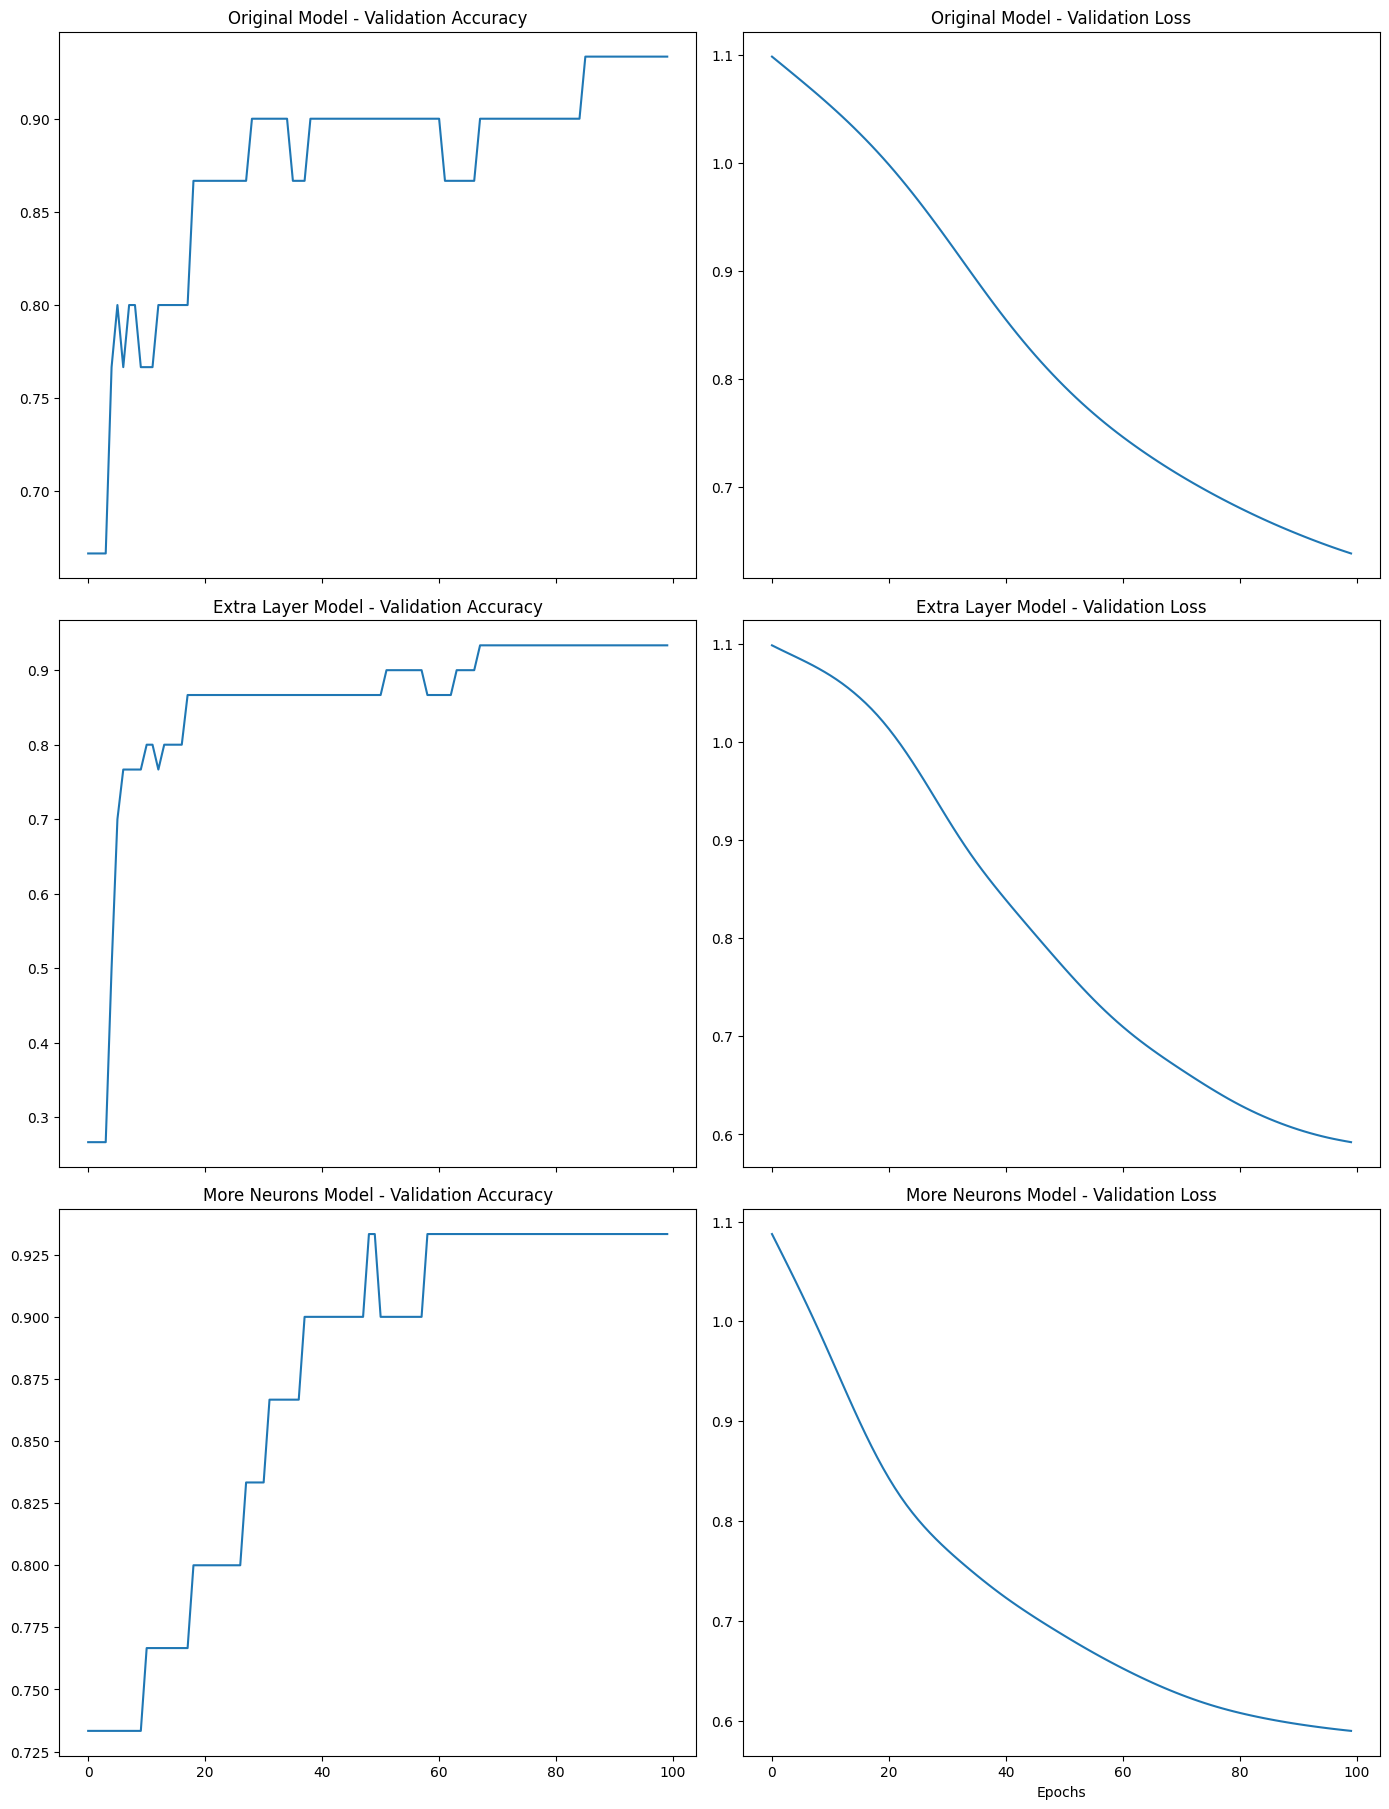

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(14, 18), sharex=True)

# Original model
axs[0, 0].plot(accuracy_list)
axs[0, 0].set_title("Original Model - Validation Accuracy")
axs[0, 1].plot(loss_list)
axs[0, 1].set_title("Original Model - Validation Loss")

# Model with extra hidden layer
axs[1, 0].plot(accuracy_list_extra_layer)
axs[1, 0].set_title("Extra Layer Model - Validation Accuracy")
axs[1, 1].plot(loss_list_extra_layer)
axs[1, 1].set_title("Extra Layer Model - Validation Loss")

# Model with more neurons
axs[2, 0].plot(accuracy_list_more_neurons)
axs[2, 0].set_title("More Neurons Model - Validation Accuracy")
axs[2, 1].plot(loss_list_more_neurons)
axs[2, 1].set_title("More Neurons Model - Validation Loss")

# Model with Tanh activation (optional, create a fourth row for this if you want to include it in the plot)
fig.tight_layout()
plt.xlabel("Epochs")
plt.show()


Observations

Changing the Number of Hidden Layers:

Adding an extra hidden layer can increase the model's capacity to learn more complex patterns but may also require more data and careful tuning to avoid overfitting.

Changing the Number of Neurons in Hidden Layers:

Increasing the number of neurons in hidden layers also increases the model's capacity. This often improves performance up to a point but may lead to overfitting if the model becomes too complex relative to the amount of training data.

Using a Different Activation Function:

Using Tanh instead of ReLU can affect the model's convergence and performance. ReLU is generally preferred due to its ability to mitigate the vanishing gradient problem, but Tanh can be beneficial in some scenarios where centered data (zero mean) is advantageous.
These experiments help understand how different aspects of neural network architecture impact model performance.